In [41]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from dash import Dash, dcc, html, Input, Output
import sklearn as sns

In [42]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [43]:
kc_house_data = pd.read_csv('kc_house_data.csv', encoding='latin')

In [44]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Nettoyage des données

In [45]:

kc_house_data.columns = kc_house_data.columns.str.strip().str.lower().str.replace(' ', '_')

In [46]:
# Dimension des données

print(kc_house_data.shape)

(21613, 21)


In [47]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [49]:
kc_house_data.describe()

# Ce sont des variables quantitatives(numériques)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 1) Traitement de valeurs manquantes 

In [50]:
kc_house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

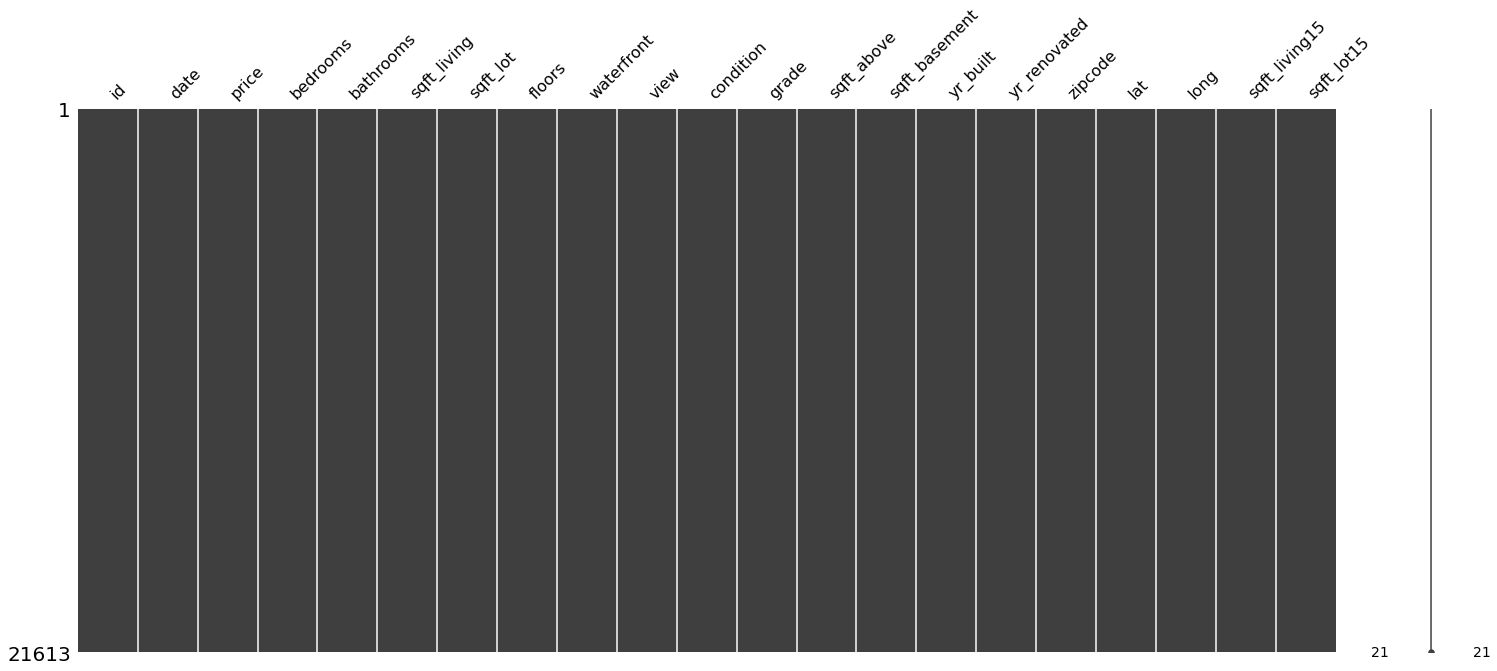

In [51]:

msno.matrix(kc_house_data)

### 2) Traitement des doublons

In [52]:
print(kc_house_data.duplicated().value_counts())

False    21613
dtype: int64


### 3) Transformation du type "date"

In [53]:
kc_house_data.date

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [54]:
kc_house_data["date"] = pd.to_datetime(kc_house_data["date"])

kc_house_data.date


0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [55]:
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [56]:
#AJOUT 3 COLONNES ANNEE MOIS ET JOUR

kc_house_data['year'] = kc_house_data['date'].dt.year
kc_house_data['month'] = kc_house_data['date'].dt.month   
kc_house_data['day'] = kc_house_data['date'].dt.day

In [57]:
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


### 4) Valeurs aberrantes

In [58]:
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [59]:
# on supprime la maison avec 33 chambres car il semble être une erreur
kc_house_data = kc_house_data[kc_house_data['bedrooms'] != 33]

In [60]:
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [61]:
# on supprime les maisons de 0 chambres car il semble être une erreur
kc_house_data = kc_house_data[kc_house_data['bedrooms'] != 0]

In [62]:
kc_house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [63]:
kc_house_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
0.00       3
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [64]:
# on supprime les maisons avec 0 bathrooms car il semble être une erreur
kc_house_data = kc_house_data[kc_house_data['bathrooms'] != 0]

In [65]:
kc_house_data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [66]:
# on supprime l'identifiant "id" car il semble être inutile ici
kc_house_data = kc_house_data.drop(['id'], axis=1)

### 5) Transformation du "zipcode" de int à object

In [67]:
data_types_dict = {'zipcode': str} 
kc_house_data = kc_house_data.astype(data_types_dict)
kc_house_data.dtypes


date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
month                     int64
day                       int64
dtype: object

In [68]:
kc_house_data = pd.get_dummies(kc_house_data)

### 6) Corrélations

In [69]:
kc_house_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
price,1.000000,0.315966,0.525915,0.701921,0.089885,0.256831,0.266438,0.397323,0.036000,0.667935,0.605395,0.323772,0.053995,0.126418,0.306772,0.022103,0.585273,0.082841,0.003757,-0.009954,-0.014699,-0.091983,-0.080357,-0.076823,0.271192,0.065110,0.133697,0.016982,0.033053,-0.021649,-0.012960,-0.017508,-0.029616,-0.063565,-0.106178,0.007609,0.029170,-0.024393,0.024242,-0.072796,-0.073924,-0.060042,0.102550,-0.008128,-0.078956,0.212619,0.204912,-0.100384,-0.027633,0.047274,0.051426,-0.072038,-0.044982,-0.074560,-0.018910,-0.003476,-0.010216,0.009172,0.057184,0.088669,0.037357,-0.071869,0.068059,0.020567,0.090975,-0.075430,0.011819,-0.046845,0.065849,0.169870,0.036161,0.026614,0.016159,-0.051603,0.078085,0.029923,-0.026604,-0.040610,-0.063775,0.003475,0.018806,-0.057226,-0.035771,-0.046069,-0.022573,-0.091732,0.040489,-0.069300,-0.054452,-0.074086,0.083653
bedrooms,0.315966,1.000000,0.527870,0.593178,0.033602,0.183707,-0.006869,0.082437,0.023440,0.366174,0.492543,0.309261,0.160736,0.019160,-0.011595,0.136561,0.404532,0.031892,-0.009146,-0.000792,-0.009537,0.003104,-0.004821,-0.001862,0.065214,0.046948,0.079790,0.039792,0.046286,-0.006173,0.018676,-0.031254,-0.000903,-0.024608,0.009019,-0.002315,0.025387,0.013859,0.007468,0.015528,0.015812,0.001702,0.029765,0.017096,0.012890,0.036668,0.083530,0.005740,-0.014691,0.044760,-0.022272,-0.018344,0.009819,0.024543,0.056978,0.023100,-0.048495,0.009852,0.040567,0.069507,0.025997,0.018425,-0.009374,-0.067716,0.023927,-0.037534,-0.046392,-0.017271,-0.014115,0.017076,-0.030899,-0.042047,-0.063104,-0.041105,-0.011377,-0.026623,-0.024828,-0.076487,-0.039542,-0.054070,-0.021523,-0.031740,-0.013171,-0.007864,0.000739,-0.046651,0.002932,-0.008149,0.005459,-0.024046,-0.021664
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063742,0.188381,-0.126443,0.665834,0.686664,0.283459,0.507166,0.050540,0.024301,0.224889,0.569878,0.088297,-0.026592,0.007539,-0.005145,-0.017646,-0.034695,-0.010213,0.065356,0.035495,0.087885,0.006106,-0.004121,-0.007836,0.020154,-0.006666,0.021434,-0.026807,-0.010844,0.005930,0.066147,0.004086,0.074675,0.006590,0.005861,-0.040468,0.040516,0.001580,0.056570,0.067917,0.089819,0.002159,0.000608,0.053442,0.061769,-0.025726,-0.012761,-0.003023,0.043851,0.068470,-0.019732,0.018662,0.072128,0.104749,0.043791,0.020758,0.015180,-0.039766,0.005862,-0.050826,-0.010272,-0.022350,0.003928,0.037646,-0.053980,-0.020852,-0.063877,-0.070684,0.013061,-0.007766,-0.053511,-0.073391,-0.075639,-0.036216,-0.011191,-0.072896,-0.021540,-0.056807,-0.029001,-0.099716,-0.002252,-0.055335,-0.026075,-0.048804,0.008275
sqft_living,0.701921,0.593178,0.755755,1.000000,0.173449,0.353941,0.103853,0.284704,-0.059397,0.762776,0.876448,0.435152,0.318140,0.055303,0.052178,0.241200,0.756400,0.184337,-0.029031,0.012108,-0.007388,-0.025074,-0.047542,-0.018908,0.1

In [70]:
# Corrélations des données en fonction du prix
kc_house_data.corrwith(kc_house_data.price).sort_values(ascending=False)

price            1.000000
sqft_living      0.701921
grade            0.667935
sqft_above       0.605395
sqft_living15    0.585273
bathrooms        0.525915
view             0.397323
sqft_basement    0.323772
bedrooms         0.315966
lat              0.306772
zipcode_98004    0.271192
waterfront       0.266438
floors           0.256831
zipcode_98039    0.212619
zipcode_98040    0.204912
zipcode_98112    0.169870
zipcode_98006    0.133697
yr_renovated     0.126418
zipcode_98033    0.102550
zipcode_98105    0.090975
sqft_lot         0.089885
zipcode_98075    0.088669
zipcode_98199    0.083653
sqft_lot15       0.082841
zipcode_98119    0.078085
zipcode_98102    0.068059
zipcode_98109    0.065849
zipcode_98005    0.065110
zipcode_98074    0.057184
yr_built         0.053995
zipcode_98053    0.051426
zipcode_98052    0.047274
zipcode_98177    0.040489
zipcode_98077    0.037357
zipcode_98115    0.036161
condition        0.036000
zipcode_98008    0.033053
zipcode_98122    0.029923
zipcode_9802

In [71]:
colo_list = [
'price',
'sqft_living',
'grade',
'sqft_above',
'sqft_living15',
'bathrooms', 
'view',
'sqft_basement',
'bedrooms',
'lat',
'zipcode_98004',    
'waterfront',      
'floors',           
'zipcode_98039',    
'zipcode_98040',   
'zipcode_98112',    
'zipcode_98006',    
'yr_renovated',     
'zipcode_98033',    
'zipcode_98105',    
'sqft_lot',         
'zipcode_98075',    
'zipcode_98199',    
'sqft_lot15',
'zipcode_98168',   
'zipcode_98001',   
'zipcode_98042',  
'zipcode_98023',
'long'         
]

In [72]:
kc_house_data = kc_house_data[colo_list]

In [73]:
kc_house_data

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,zipcode_98004,waterfront,floors,zipcode_98039,zipcode_98040,zipcode_98112,zipcode_98006,yr_renovated,zipcode_98033,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98168,zipcode_98001,zipcode_98042,zipcode_98023,long
0,221900.0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,0,1.0,0,0,0,0,0,0,0,5650,0,0,5650,0,0,0,0,-122.257
1,538000.0,2570,7,2170,1690,2.25,0,400,3,47.7210,0,0,2.0,0,0,0,0,1991,0,0,7242,0,0,7639,0,0,0,0,-122.319
2,180000.0,770,6,770,2720,1.00,0,0,2,47.7379,0,0,1.0,0,0,0,0,0,0,0,10000,0,0,8062,0,0,0,0,-122.233
3,604000.0,1960,7,1050,1360,3.00,0,910,4,47.5208,0,0,1.0,0,0,0,0,0,0,0,5000,0,0,5000,0,0,0,0,-122.393
4,510000.0,1680,8,1680,1800,2.00,0,0,3,47.6168,0,0,1.0,0,0,0,0,0,0,0,8080,0,0,7503,0,0,0,0,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,8,1530,1530,2.50,0,0,3,47.6993,0,0,3.0,0,0,0,0,0,0,0,1131,0,0,1509,0,0,0,0,-122.346
21609,400000.0,2310,8,2310,1830,2.50,0,0,4,47.5107,0,0,2.0,0,0,0,0,0,0,0,5813,0,0,7200,0,0,0,0,-122.362
21610,402101.0,1020,7,1020,1020,0.75,0,0,2,47.5944,0,0,2.0,0,0,0,0,0,0,0,1350,0,0,2007,0,0,0,0,-122.299
21611,400000.0,1600,8,1600,1410,2.50,0,0,3,47.5345,0,0,2.0,0,0,0,0,0,0,0,2388,0,0,1287,0,0,0,0,-122.069


AttributeError: module 'sklearn' has no attribute 'heatmap'

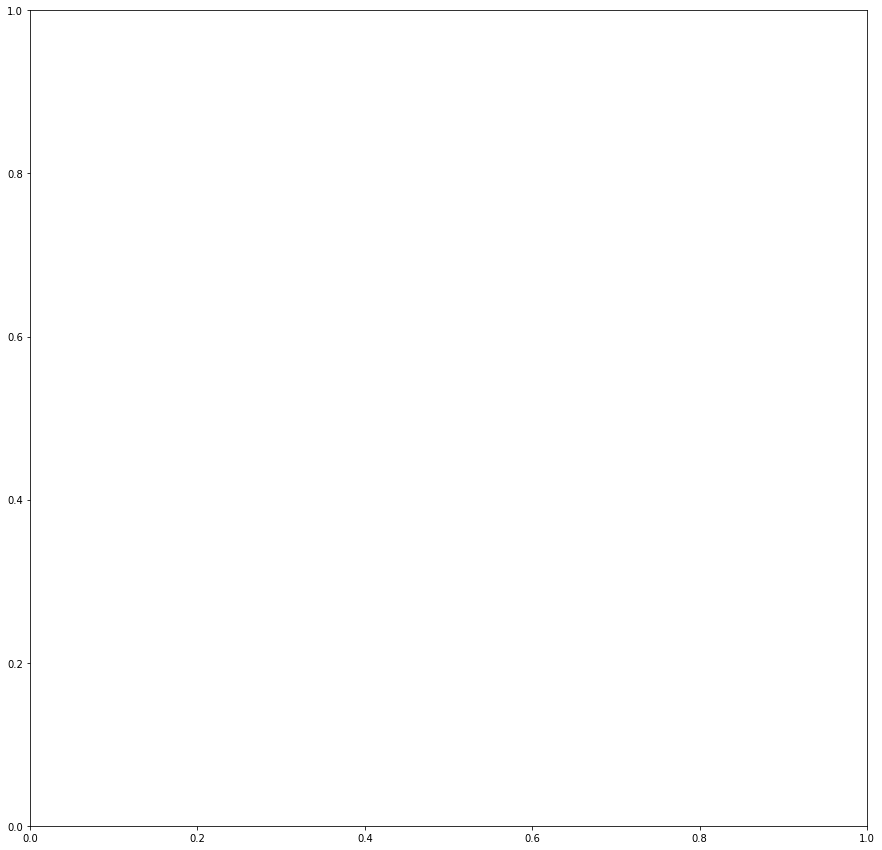

In [75]:
# Affichage correlations de toutes les données
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(kc_house_data.corr(), annot=True, ax=ax)


# Explorarion des données :

In [ ]:
fig = px.density_mapbox(kc_house_data, lat='lat', lon='long', z='price', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

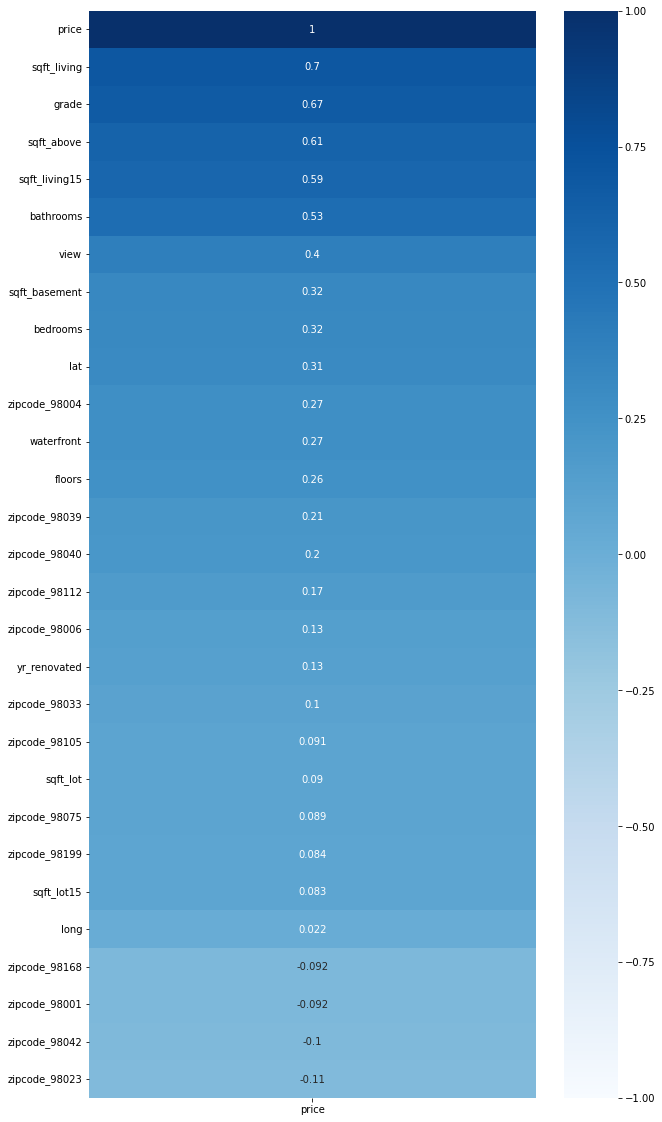

In [ ]:
plt.figure(figsize=(10, 20))
heatmap = sns.heatmap(kc_house_data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

Visualisation de la distribution des données numériques à l’aide d’un histogramme :

In [ ]:
#for col in col_num :
   # kc_house_data[col].plot(kind='hist')
   # plt.yscale('log')
   # plt.title('Ceci est un histograme de la colonne : {}'.format(col))
   # plt.show()

In [ ]:
kc_house_data

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,zipcode_98004,waterfront,floors,zipcode_98039,zipcode_98040,zipcode_98112,zipcode_98006,yr_renovated,zipcode_98033,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98168,zipcode_98001,zipcode_98042,zipcode_98023,long
0,221900.0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,0,1.0,0,0,0,0,0,0,0,5650,0,0,5650,0,0,0,0,-122.257
1,538000.0,2570,7,2170,1690,2.25,0,400,3,47.7210,0,0,2.0,0,0,0,0,1991,0,0,7242,0,0,7639,0,0,0,0,-122.319
2,180000.0,770,6,770,2720,1.00,0,0,2,47.7379,0,0,1.0,0,0,0,0,0,0,0,10000,0,0,8062,0,0,0,0,-122.233
3,604000.0,1960,7,1050,1360,3.00,0,910,4,47.5208,0,0,1.0,0,0,0,0,0,0,0,5000,0,0,5000,0,0,0,0,-122.393
4,510000.0,1680,8,1680,1800,2.00,0,0,3,47.6168,0,0,1.0,0,0,0,0,0,0,0,8080,0,0,7503,0,0,0,0,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,8,1530,1530,2.50,0,0,3,47.6993,0,0,3.0,0,0,0,0,0,0,0,1131,0,0,1509,0,0,0,0,-122.346
21609,400000.0,2310,8,2310,1830,2.50,0,0,4,47.5107,0,0,2.0,0,0,0,0,0,0,0,5813,0,0,7200,0,0,0,0,-122.362
21610,402101.0,1020,7,1020,1020,0.75,0,0,2,47.5944,0,0,2.0,0,0,0,0,0,0,0,1350,0,0,2007,0,0,0,0,-122.299
21611,400000.0,1600,8,1600,1410,2.50,0,0,3,47.5345,0,0,2.0,0,0,0,0,0,0,0,2388,0,0,1287,0,0,0,0,-122.069


price / sqft_living


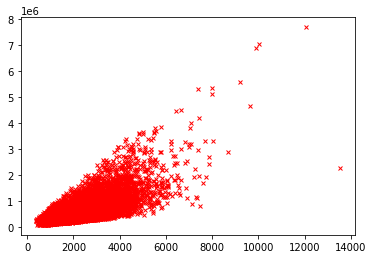

price / grade


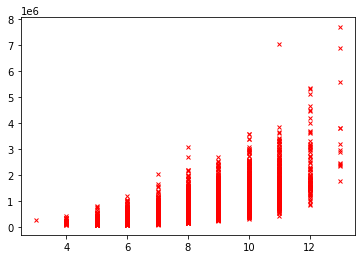

price / sqft_above


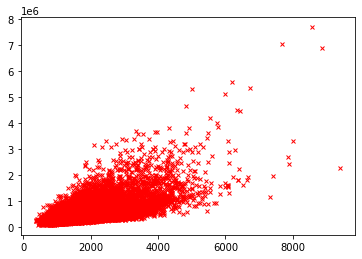

price / sqft_living15


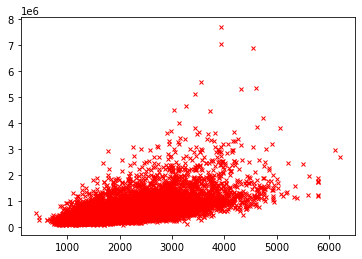

price / bathrooms


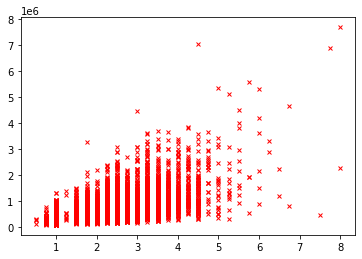

price / view


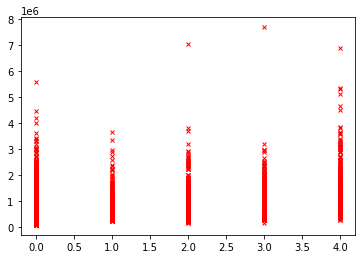

price / bedrooms


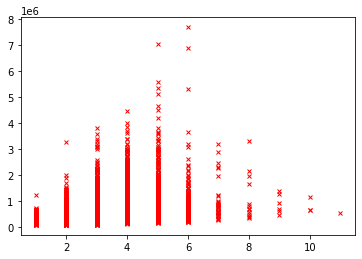

In [ ]:
# Visualisation des features en fonction du prix

for index in kc_house_data:
    if index in ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "bedrooms"]:
        print("price / " + index)
        plt.plot(kc_house_data[index], kc_house_data['price'], 'rx', markersize=4)
        plt.show()

### Export csv

In [ ]:
kc_house_data.to_csv("df2.csv")
